# Practical Questions

### Installing requirements
We need to have `pillow` package for image processing.

In [1]:
%pip install pillow

  Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from PIL import Image

### Defining `get_image_bits` functions (1)
This functions is gonna return the bits-per-pixel.

In [3]:
def get_image_bits(image_path: str):
    try:
        # Open the image
        img = Image.open(image_path)

        # Get the number of bits per pixel
        mode  = img.mode

        bits_per_pixel = len(mode) * 8

        return bits_per_pixel

    except FileNotFoundError:
        print(f"Error: The file at '{image_path}' was not found.")
        return None

Now we can get the image bits-per-pixel.

In [8]:
image_path = "../../campusdrive.png"

bits = get_image_bits(image_path)
print(f"The image at {image_path} has {bits} bits per pixel.")

The image at ../../campusdrive.png has 8 bits per pixel.


#### Code Description (Image Bits Extractor)

1. **Open the Image:**
   - The code uses the Python Imaging Library (PIL) to open the specified image file using the `Image.open` method.

2. **Get Mode and Calculate Bits per Pixel:**
   - The image mode, representing the color space and channel layout (e.g., RGB or grayscale), is retrieved using `img.mode`.
   - The number of bits per pixel is calculated by multiplying the length of the mode by 8, as each channel typically uses 8 bits.

3. **Handle File Not Found Exception:**
   - The code is wrapped in a try-except block to handle the case where the specified image file is not found. If a `FileNotFoundError` occurs, an error message is printed, and the function returns `None`.


### Bit-Per-Pixel Reduction (2)
Now we can define a function to reduce the bit-per-pixel rate for an image.

In [22]:
from PIL import Image
import os

def reduce_bits_and_save(input_path: str, output_folder: str, start_bits: int=8, end_bits: int=1):
  try:
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the image
    img = Image.open(input_path)

    # Convert to grayscale ("L" mode)
    img = img.convert("L")

    # Iterate over the desired bit depths
    for target_bits in range(start_bits, end_bits - 1, -1):
      # Create a new image with the specified bit depth
      reduced_img = Image.new("L", img.size)

      # Extract the desired bits from each pixel
      for x in range(img.width):
        for y in range(img.height):
          pixel_value = img.getpixel((x, y))
          reduced_pixel_value = pixel_value & ((1 << target_bits) - 1)
          reduced_img.putpixel((x, y), reduced_pixel_value)

      # Construct the output file path
      output_path = os.path.join(output_folder, f"{os.path.basename(input_path).split('.')[0]}_{target_bits}bits.png")

      # Save the reduced-bit image
      reduced_img.save(output_path)
      print(f"Image saved: {output_path}")

  except FileNotFoundError:
    print(f"Error: The file at '{input_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

Now we can reduce the image bits-per-pixels.

In [23]:

input_image_path = "../../campusdrive.png"
output_folder_path = "image-reduction-results"
start_bits = 8  # Set the starting bit depth
end_bits = 1    # Set the ending bit depth

reduce_bits_and_save(input_image_path, output_folder_path, start_bits, end_bits)

Image saved: image-reduction-results\campusdrive_8bits.png
Image saved: image-reduction-results\campusdrive_7bits.png
Image saved: image-reduction-results\campusdrive_6bits.png
Image saved: image-reduction-results\campusdrive_5bits.png
Image saved: image-reduction-results\campusdrive_4bits.png
Image saved: image-reduction-results\campusdrive_3bits.png
Image saved: image-reduction-results\campusdrive_2bits.png
Image saved: image-reduction-results\campusdrive_1bits.png


#### Code Description (Image Bit Reduction and Saving)

1. **Create Output Folder:**
   - The code checks if the specified output folder exists and creates it if not.

2. **Open and Convert Image:**
   - The input image is opened using the PIL library, and it is converted to grayscale using the "L" mode.

3. **Iterate Over Bit Depths:**
   - The function iterates over the desired range of bit depths, starting from `start_bits` down to `end_bits`.

4. **Reduce Bits and Save Images:**
   - For each bit depth, a new image is created, and the desired bits are extracted from each pixel.
   - The reduced-bit image is saved to the output folder with a filename indicating the original filename and the bit depth.

5. **Handle Exceptions:**
   - The code includes error handling for file not found and general exceptions during image processing.

### The Result
We need to install `matplotlib` package to show charts and images in plots.

In [4]:
%pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 56.1/56.1 kB 976.1 kB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

def show_images(folder_path: str, num_images: int=8):
    # Get a list of all files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Choose the number of images you want to display
    num_images = min(len(image_files), num_images)
    
    # Reverse the order of the images
    image_files = image_files[::-1]

    # Create a 2x4 grid for displaying the images
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))

    # Flatten the 2D array of subplots for easier indexing
    axes = axes.flatten()

    # Loop through the images and display them in the subplots
    for i in range(num_images):
        image_path = os.path.join(folder_path, image_files[i])
        img = Image.open(image_path)

        axes[i].imshow(img, cmap='gray')  # Display in grayscale
        axes[i].axis('off')  # Turn off axis labels for cleaner display

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

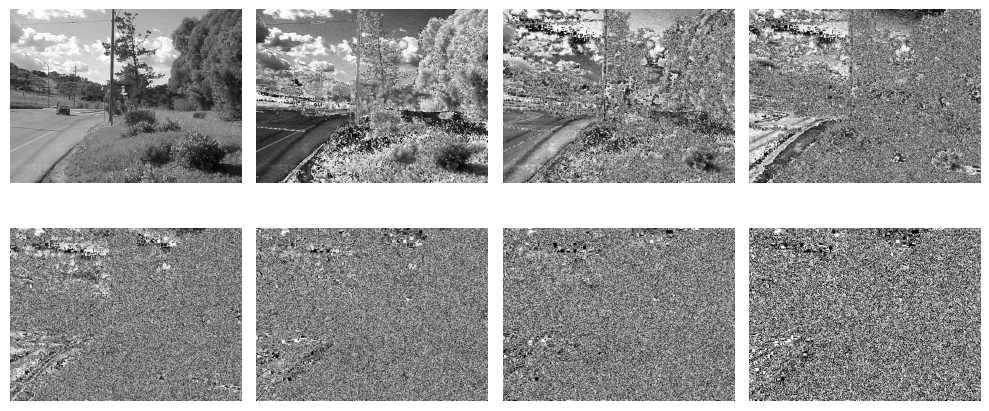

In [12]:
folder_path = "image-reduction-results"
show_images(folder_path)

#### Code Description (Image Viewer using Matplotlib)

1. **Get Image Files:**
   - The code retrieves a list of image files in the specified folder based on common image file extensions.

2. **Choose Number of Images:**
   - The number of images to display is determined by the minimum of the total number of images and the specified `num_images` parameter.

3. **Reverse Image Order:**
   - The order of the images is reversed to display the most recent images first.

4. **Create 2x4 Grid:**
   - Matplotlib is used to create a 2x4 grid of subplots for displaying the images.

5. **Display Images:**
   - The function loops through the selected images, opens each one using PIL, and displays it in the corresponding subplot. Grayscale is used for display, and axis labels are turned off for cleaner presentation.

6. **Adjust Layout and Show:**
   - Layout adjustments are made for better spacing, and the final plot is displayed using `plt.show()`.
   

### Define Mask Generator Function (3)

In [13]:
import numpy as np

def generate_random_mask(image_size):
  """
    Generate a random binary mask.

    Parameters:
    - image_size (tuple): Size of the mask in the format (height, width).

    Returns:
    - mask (numpy.ndarray): Random binary mask with values of 0 or 1.
  """
  # Generate a random mask with values of 0 or 1
  mask = np.random.randint(2, size=image_size, dtype=np.uint8)
  return mask

#### Code Description (Random Mask Generator)

1. **Generate Random Mask:**
   - The `generate_random_mask` function takes a single parameter, `image_size`, which is a tuple specifying the size of the mask in the format (height, width).

2. **NumPy Random Integer Generation:**
   - The function uses NumPy's `randint` function to generate random integers. The range is set from 0 to 2 (exclusive), resulting in values of 0 or 1.

3. **Data Type Specification:**
   - The `dtype=np.uint8` parameter ensures that the generated array has an unsigned 8-bit integer data type.

4. **Return the Mask:**
   - The function returns the generated random binary mask.

### Define Mask Apply Function

In [14]:
def apply_quantization_with_mask(original_img, mask, target_bits):
  """
    Apply quantization to an image based on a binary mask.

    Parameters:
    - original_img (Image.Image): The original image.
    - mask (numpy.ndarray): Binary mask indicating pixels to apply quantization.
    - target_bits (int): Number of bits for quantization.

    Returns:
    - reduced_img (Image.Image): Image after quantization based on the mask.
  """
  # Create a new image with the specified bit depth
  reduced_img = Image.new("L", original_img.size)

  # Extract the desired bits from each pixel based on the mask
  for x in range(original_img.width):
    for y in range(original_img.height):
      pixel_value = original_img.getpixel((x, y))

      # Apply quantization only if the corresponding mask value is 1
      if mask[y, x] == 1:
        reduced_pixel_value = pixel_value & ((1 << target_bits) - 1)
      else:
        reduced_pixel_value = pixel_value

      reduced_img.putpixel((x, y), reduced_pixel_value)

  return reduced_img

#### Code Description (Image Quantization with Mask)

1. **Create New Image:**
   - A new image (`reduced_img`) is created with the specified bit depth ("L" mode).

2. **Quantization with Mask:**
   - The function iterates through each pixel in the original image.
   - If the corresponding mask value is 1, quantization is applied by bitwise AND with the target bits.
   - If the mask value is 0, the original pixel value is retained.

3. **Return the Reduced Image:**
   - The function returns the resulting image after quantization based on the mask.

Now we can make modifications on `reduce_bits_and_save` to make `reduce_bits_and_save_with_mask` function to apply the above mask on the images.

In [15]:

def reduce_bits_and_save_with_mask(input_path, output_folder, start_bits=8, end_bits=1):
    """
    Apply image quantization with a randomly generated mask and save the resulting images.

    Parameters:
    - input_path (str): Path to the original image.
    - output_folder (str): Path to the folder where reduced-bit images will be saved.
    - start_bits (int): Starting bit depth for quantization (default is 8).
    - end_bits (int): Ending bit depth for quantization (default is 1).

    Returns:
    - original_img (Image.Image): Original image opened using PIL.
    - output_folder (str): Path to the folder where images are saved.
    - start_bits (int): Starting bit depth for quantization.
    - end_bits (int): Ending bit depth for quantization.
    """
    try:
        # Create output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        # Open the original image
        original_img = Image.open(input_path)

        # Convert to grayscale ("L" mode)
        original_img = original_img.convert("L")

        # Iterate over the desired bit depths
        for target_bits in range(start_bits, end_bits - 1, -1):
            # Generate a random mask for each quantization bit change
            mask = generate_random_mask((original_img.height, original_img.width))

            # Apply quantization with the generated mask
            reduced_img = apply_quantization_with_mask(original_img, mask, target_bits)

            # Save the reduced-bit image
            output_path = os.path.join(output_folder, f"{os.path.basename(input_path).split('.')[0]}_{target_bits}bits_masked.png")
            reduced_img.save(output_path)

        return original_img, output_folder, start_bits, end_bits

    except FileNotFoundError:
        print(f"Error: The file at '{input_path}' was not found.")
    except Exception as e:
        print(f"Error processing the image: {str(e)}")

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

In [16]:
input_image_path = "../../campusdrive.png"
output_folder_path = "image-reduction-results-with-mask"
start_bits = 8  # Set the starting bit depth
end_bits = 1    # Set the ending bit depth

result = reduce_bits_and_save_with_mask(input_image_path, output_folder_path, start_bits, end_bits)

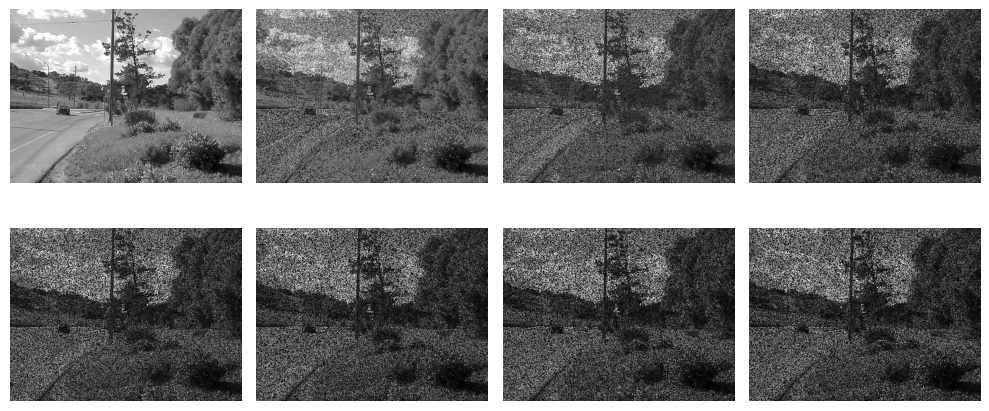

In [18]:
folder_path = "image-reduction-results-with-mask"
show_images(folder_path)

#### Code Description (Image Bit Reduction and Saving with Random Mask)

1. **Create Output Folder:**
   - The code checks if the specified output folder exists and creates it if not.

2. **Open Original Image:**
   - The original image is opened using PIL, and it is converted to grayscale.

3. **Iterate Over Bit Depths:**
   - The function iterates over the desired range of bit depths.

4. **Generate Random Mask:**
   - For each bit depth, a random binary mask is generated using the `generate_random_mask` function.

5. **Apply Quantization with Mask:**
   - Quantization is applied to the original image using the generated mask and the `apply_quantization_with_mask` function.

6. **Save Reduced-Bit Image:**
   - The resulting image is saved to the output folder with a filename indicating the original filename and the bit depth.

7. **Return Information:**
   - The function returns information about the original image, output folder, and the range of bit depths.

8. **Error Handling and Visualization:**
   - The code includes error handling for file not found and general exceptions during image processing.
   - It adjusts the layout for better visualization using Matplotlib.

### Get File Info Function - Image Compression (4)

In [27]:
def get_image_info(file_path):
  """
    Retrieve information about an image file.

    Parameters:
    - file_path (str): Path to the image file.

    Returns:
    - dict: Dictionary containing image information.
      - 'image_size' (tuple): Size of the image in the format (width, height).
      - 'original_size' (float): Estimated original size of the image in bytes.
      - 'bit_depth' (int): Bit depth of the image.
      - 'file_size' (int): Size of the image file in bytes.
      - 'compression_percentage' (float): Compression percentage of the image file.
  """
  try:
    # Open the image
    img = Image.open(file_path)

    # Get image size
    image_size = img.size  # (width, height)

    # Get bit depth
    bit_depth = img.bits if hasattr(img, 'bits') else 8  # Default to 8 bits if not available

    # Get file size
    file_size = os.path.getsize(file_path)  # in bytes

    # Calculate compression percentage
    original_size = image_size[0] * image_size[1] * bit_depth / 8  # in bytes
    compression_percentage = ((original_size - file_size) / original_size) * 100

    return {
      'image_size': image_size,
      'original_size': original_size,
      'bit_depth': bit_depth,
      'file_size': file_size,
      'compression_percentage': compression_percentage
    }

  except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

In [28]:
file_path = "../../SharifLogo.png"
result = get_image_info(file_path)

if result:
  print(f"Image Size: {result['image_size']}")
  print(f"Image Original Size: {result['original_size']}")
  print(f"Bit Depth: {result['bit_depth']} bits per pixel")
  print(f"File Size: {result['file_size']} bytes")
  print(f"Compression Percentage: {result['compression_percentage']:.2f}%")


Image Size: (955, 956)
Image Original Size: 912980.0
Bit Depth: 8 bits per pixel
File Size: 140341 bytes
Compression Percentage: 84.63%


#### Code Description (Image Information Retrieval)

1. **Open the Image:**
   - The code opens the image file using PIL.

2. **Get Image Size:**
   - The size of the image in the format (width, height) is retrieved using the `size` attribute.

3. **Get Bit Depth:**
   - The bit depth of the image is obtained, defaulting to 8 bits if the `bits` attribute is not available.

4. **Get File Size:**
   - The size of the image file in bytes is retrieved using `os.path.getsize()`.

5. **Calculate Original Size:**
   - An estimated original size of the image is calculated based on width, height, and bit depth.

6. **Calculate Compression Percentage:**
   - The compression percentage of the image file is calculated based on the difference between the estimated original size and the actual file size.

7. **Return Image Information:**
   - The function returns a dictionary containing various pieces of information about the image.

8. **Error Handling:**
   - The code includes error handling for file not found and general exceptions during image processing.

### Image Enhancement (5)
We need to install requirements for creating gif using images.

In [5]:
%pip install imageio

     -------------------------------------- 313.3/313.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from PIL import Image
import numpy as np
import os

def traumatize_and_save_images(input_path: str, output_folder: str, num_steps: int=10):
  """
    Gradually traumatize an image through non-linear transformations and save the resulting images.

    Parameters:
    - input_path (str): Path to the original image.
    - output_folder (str): Path to the folder where traumatized images will be saved.
    - num_steps (int): Number of steps for gradual traumatization (default is 10).

    Returns:
    - output_folder (str): Path to the folder where traumatized images are saved.
  """
  try:
      # Create output folder if it doesn't exist
      os.makedirs(output_folder, exist_ok=True)

      # Open the original image
      original_img = Image.open(input_path)

      # Convert to grayscale if the image is in color
      original_img = original_img.convert("L")

      # Get the pixel data as a NumPy array
      pixels = np.array(original_img)

      # Calculate the step size for traumatizing
      step_size = 1.0 / num_steps

      # Traumatize the image gradually and save at each step
      for i in range(num_steps + 1):
        # Create a copy of the original pixel data
        traumatized_pixels = pixels.copy()

        # Apply non-linear transformation to pixel values
        traumatized_pixels = apply_non_linear_transformation(traumatized_pixels, i * step_size)

        # Create a new image from the traumatized pixel data
        traumatized_img = Image.fromarray(traumatized_pixels)

        # Save the traumatized image
        output_path = os.path.join(output_folder, f"traumatized_{i}.png")
        traumatized_img.save(output_path)

      return output_folder

  except FileNotFoundError:
    print(f"Error: The file at '{input_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

def apply_non_linear_transformation(pixels, factor):
  # Apply a non-linear transformation to the pixel values
  return np.clip(pixels - factor * pixels**2, 0, 255).astype(np.uint8)

#### Code Description (Gradual Image Traumatization and Saving)

1. **Import Libraries:**
   - The function imports necessary libraries, including PIL for image processing and NumPy for array operations.

2. **Create Output Folder:**
   - The code checks if the specified output folder exists and creates it if not.

3. **Open the Original Image:**
   - The original image is opened using PIL.

4. **Convert to Grayscale:**
   - The function converts the image to grayscale if it is in color.

5. **Get Pixel Data:**
   - The pixel data is extracted from the image and stored as a NumPy array.

6. **Calculate Step Size:**
   - The step size for traumatizing is calculated based on the number of steps.

7. **Traumatize the Image Gradually:**
   - The function iterates over each step, creating a copy of the original pixel data.
   - A non-linear transformation is applied to the pixel values, gradually increasing the effect.
   - The resulting traumatized image is saved at each step.

8. **Return Output Folder:**
   - The function returns the path to the folder where traumatized images are saved.

9. **Error Handling:**
   - The code includes error handling for file not found and general exceptions during image processing.

In [53]:
import imageio
import os

def create_gif(input_folder: str, output_path: str, duration: float=0.5):
    """
    Create a GIF from traumatized images in a folder.

    Parameters:
    - input_folder (str): Path to the folder containing traumatized images.
    - output_path (str): Path to save the output GIF.
    - duration (float): Duration of each frame in the GIF (default is 0.5 seconds).

    Returns:
    - output_path (str): Path to the created GIF.
    """
    try:
        # Get the list of traumatized images
        traumatized_images = [f for f in os.listdir(input_folder) if f.startswith("traumatized_")]

        # Sort the images based on the index in the filename
        traumatized_images.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

        # Create a gif from the traumatized images
        with imageio.get_writer(output_path, duration=duration) as writer:
            for image in traumatized_images:
                image_path = os.path.join(input_folder, image)
                img = imageio.imread(image_path)
                writer.append_data(img)

        return output_path

    except Exception as e:
        print(f"Error creating the gif: {str(e)}")

In [55]:
input_image_path = "../../bigMasoud.jpg"
traumatized_images_folder = "darkened_images"
output_gif_path = "darkened_images/Traumatized_bigMasoud.gif"

darkened_images_folder = traumatize_and_save_images(input_image_path, traumatized_images_folder, num_steps=10)
create_gif(traumatized_images_folder, output_gif_path, duration=0.5)

C:\Users\Ryan PG\AppData\Local\Temp\ipykernel_6620\3181958879.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


'darkened_images/Traumatized_bigMasoud.gif'

#### Code Description (GIF Creation from Traumatized Images)

1. **Import Libraries:**
   - The function imports the necessary libraries, including imageio for GIF creation and os for file operations.

2. **Get Traumatized Images:**
   - The code retrieves the list of traumatized images in the specified folder.

3. **Sort Images:**
   - The traumatized images are sorted based on the index in the filename.

4. **Create GIF:**
   - The function uses imageio to create a GIF from the sorted traumatized images.
   - Each frame in the GIF corresponds to one traumatized image.

5. **Return Output Path:**
   - The function returns the path to the created GIF.

6. **Error Handling:**
   - The code includes general exception handling for errors that may occur during GIF creation.

### Histogram (6)

In [61]:
def display_and_save_histogram(image_path: str, output_path: str, image_name: str):
  """
    Display and save histograms for each RGB channel of an image.

    Parameters:
    - image_path (str): Path to the image.
    - output_path (str): Path to the folder where histograms will be saved.
    - image_name (str): Name of the image for labeling the histograms.

    Returns:
    - None
  """
  try:
    # Open the image
    img = Image.open(image_path)

    # Convert to RGB (if not already in RGB mode)
    img = img.convert("RGB")

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Calculate the histogram for each channel
    hist_r, bin_edges_r = np.histogram(img_array[:, :, 0].ravel(), bins=256, range=[0, 256])
    hist_g, bin_edges_g = np.histogram(img_array[:, :, 1].ravel(), bins=256, range=[0, 256])
    hist_b, bin_edges_b = np.histogram(img_array[:, :, 2].ravel(), bins=256, range=[0, 256])

    # Plot the histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(hist_r, color='red')
    plt.title(f'Red Channel Histogram - {image_name}')

    plt.subplot(132)
    plt.plot(hist_g, color='green')
    plt.title(f'Green Channel Histogram - {image_name}')

    plt.subplot(133)
    plt.plot(hist_b, color='blue')
    plt.title(f'Blue Channel Histogram - {image_name}')

    plt.tight_layout()
    plt.show()

    # Create output folder if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Save the histograms as images
    plt.savefig(f"{output_path}/Histogram_{image_name}.png")

  except FileNotFoundError:
    print(f"Error: The file at '{image_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

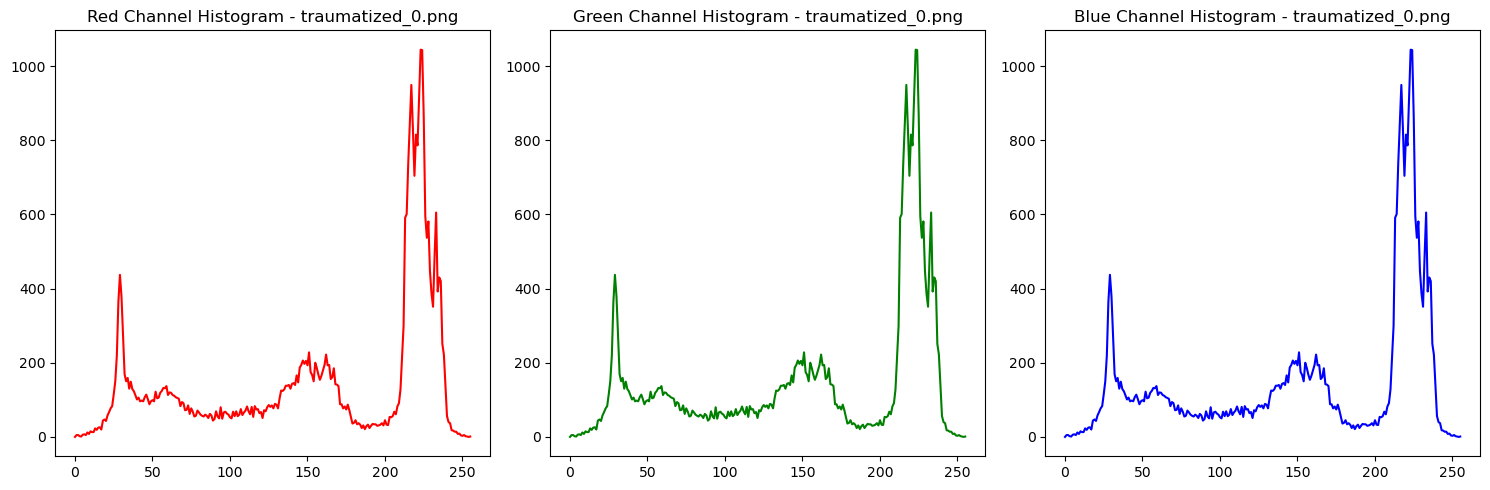

<Figure size 640x480 with 0 Axes>

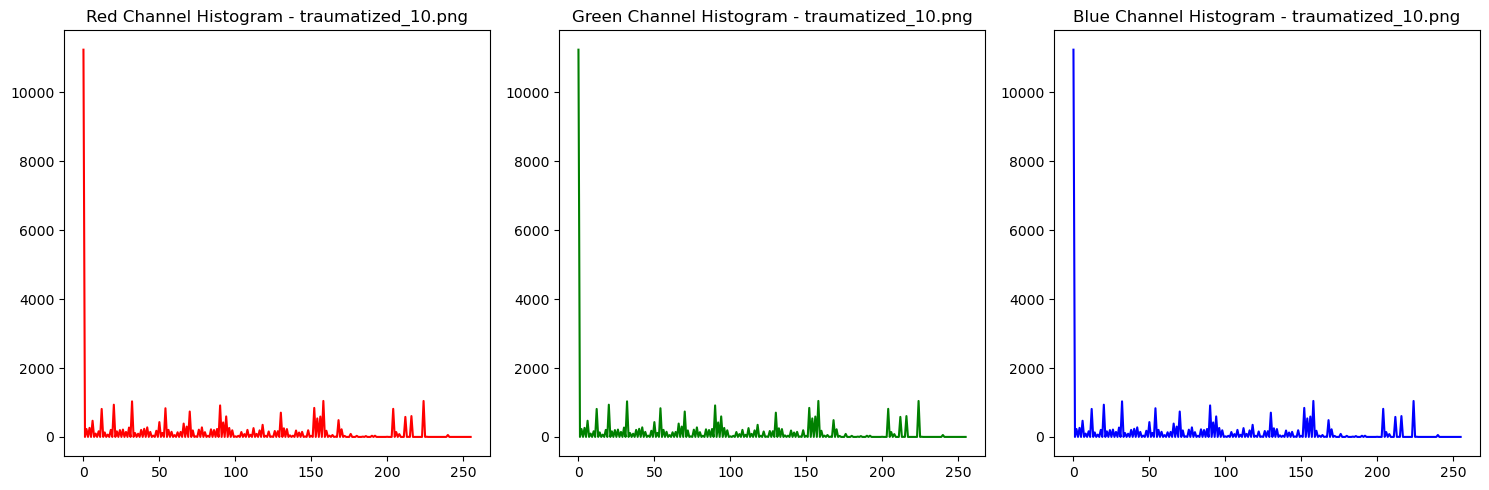

<Figure size 640x480 with 0 Axes>

In [62]:

# Example usage
output_path = "histograms"
image1_path = "./darkened_images/traumatized_0.png"
image2_path = "./darkened_images/traumatized_10.png"

# Display and save histogram for Image1
display_and_save_histogram(image1_path, output_path, image1_path.split('/')[-1])

# Display and save histogram for Image2
display_and_save_histogram(image2_path, output_path, image2_path.split('/')[-1])


#### Code Description (Image Histogram Display and Save)

1. **Open the Image:**
   - The code opens the image using PIL.

2. **Convert to RGB:**
   - The image is converted to RGB mode if it is not already in RGB mode.

3. **Convert to NumPy Array:**
   - The image is converted to a NumPy array for histogram calculation.

4. **Calculate Histograms:**
   - Histograms are calculated separately for the red, green, and blue channels using NumPy's `histogram` function.

5. **Plot Histograms:**
   - The histograms for each channel are plotted using Matplotlib.

6. **Show Plot:**
   - The plot is displayed.

7. **Create Output Folder:**
   - The code checks if the specified output folder exists and creates it if not.

8. **Save Histograms as Images:**
   - The histograms are saved as images in the specified output folder.

9. **Error Handling:**
   - The code includes error handling for file not found and general exceptions during image processing.